# CPUs and GPUs

Data is a slightly cleaned version of the [Chip dataset](https://chip-dataset.vercel.app/)

## Questions

1. How many rows are in the dataset?
2. Are there more CPUs or GPUs in the dataset?
3. Generally speaking, do GPUs or CPUs have more transistors?
4. Is the same true of CPUs and GPUs released before 2007?
5. How many times more transistors does a typical 2020 CPU have than a 2015 CPU?
6. You probably used median or mean for the previous questions. Now try the other one: does it change the answer?
7. Are there certain months of the year that are more popular to release GPUs?
8. Plot the change in process size over time for CPUs, on an **annual basis**.
9. Plot the change in frequency over time for GPUs on a **6-month basis.**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('chip-dataset.csv')

In [3]:
#How many rows are in the dataset?
#4854 rows

df

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,NaN,432.0,36.0
4850,Intel GMA 950,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN
4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN
4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN,NaN,NaN


In [4]:
#Are there more CPUs or GPUs in the dataset?
#There are more GPUs in the dataset

df.Type.value_counts()

GPU    2662
CPU    2192
Name: Type, dtype: int64

In [9]:
df.head(1)

,Product,Type,Release_Date,Process_Size_nm,TDP_W,Die_Size_mm^2,Transistors_million,Freq_MHz,Foundry,Vendor,FP16_GFLOPS,FP32_GFLOPS,FP64_GFLOPS
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN


In [16]:
# Generally speaking, do GPUs or CPUs have more transistors?
#GPUs have more transistors in general.
#df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.groupby('Type').Transistors_million.sum()

Type
CPU    1936870.0
GPU    6058798.0
Name: Transistors_million, dtype: float64

In [21]:
# Is the same true of CPUs and GPUs released before 2007?
#No, before 2007, CPUs had more transistors

,Product,Type,Release_Date,Process_Size_nm,TDP_W,Die_Size_mm^2,Transistors_million,Freq_MHz,Foundry,Vendor,FP16_GFLOPS,FP32_GFLOPS,FP64_GFLOPS,DT_type
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN,2007-02-20


In [41]:
#df['DT_type'] = pd.to_datetime(df.Release_Date)
#df['year'] = df.DT_type.dt.year
df[df.DT_type.dt.year < 2007].groupby('Type').Transistors_million.sum()

Type
CPU    80794.0
GPU    68355.0
Name: Transistors_million, dtype: float64

In [57]:
# How many times more transistors does a typical 2020 CPU have than a 2015 CPU?
transistors_2020 = df[(df.DT_type.dt.year == 2020) & (df.Type == 'CPU')].Transistors_million.mean().round(2)
transistors_2020

6597.5

In [58]:
transistors_2015 = df[(df.DT_type.dt.year == 2015) & (df.Type == 'CPU')].Transistors_million.mean().round(2)
transistors_2015

1382.42

In [60]:
(transistors_2020/transistors_2015).round(2)

#2015 CPU transistors were 4.77 times more than 2020 cPU transistors

4.77

In [63]:
# You probably used median or mean for the previous questions. Now try the other one: does it change the answer?
#Yes, it changes the answer.
median_2020 = df[(df.DT_type.dt.year == 2020) & (df.Type == 'CPU')].Transistors_million.median()
median_2020

4370.0

In [64]:
median_2015 = df[(df.DT_type.dt.year == 2015) & (df.Type == 'CPU')].Transistors_million.median()
median_2015

1400.0

In [66]:
(median_2020/median_2015).round(2)

3.12

In [79]:
# Are there certain months of the year that are more popular to release GPUs?
#Yes, January had more GPU releases than any other month
df[df.Type == 'GPU'].DT_type.dt.month.value_counts()

1.0     368
3.0     274
6.0     242
5.0     242
4.0     233
10.0    213
2.0     207
9.0     200
11.0    176
7.0     157
8.0     156
12.0    122
Name: DT_type, dtype: int64

In [80]:
# Plot the change in process size over time for CPUs, on an annual basis.
df.head(1)

,Product,Type,Release_Date,Process_Size_nm,TDP_W,Die_Size_mm^2,Transistors_million,Freq_MHz,Foundry,Vendor,FP16_GFLOPS,FP32_GFLOPS,FP64_GFLOPS,DT_type,year
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN,2007-02-20,2007.0


<AxesSubplot: xlabel='year'>

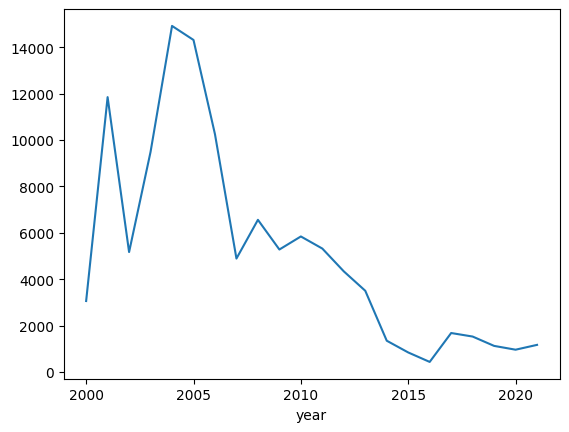

In [83]:
df[df.Type == 'CPU'].groupby('year').Process_Size_nm.sum().sort_index().plot()

<AxesSubplot: xlabel='DT_type'>

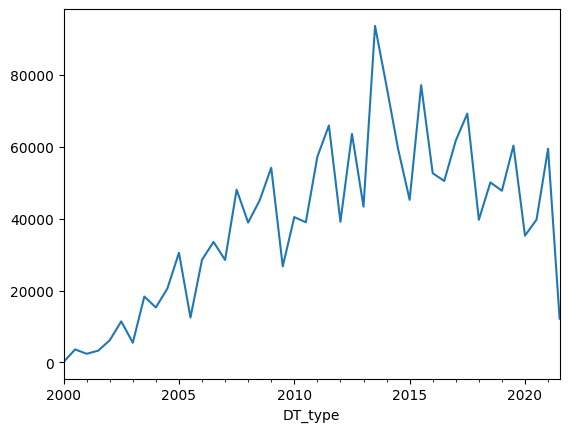

In [90]:
# Plot the change in frequency over time for GPUs on a 6-month basis.

#df_GPU = df[df.Type == 'GPU']

#I did something, it worked. Looks fine but I need help understanding.

df_GPU.resample('6M', on='DT_type').Freq_MHz.sum().plot()